This notebook intends to calculate basic summary information of `targets-for-tasrkleat/targets.fa` in the repo, and it also serves to demonstrate how to manipulate fasta file in Python [pandas](http://pandas.pydata.org/), and calculate length distribution.

In [7]:
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (15, 9)
from IPython.display import display

from Bio import SeqIO

%load_ext autoreload
%autoreload 2

In [8]:
input_fa = 'targets-for-tasrkleat/targets.fa'

In [9]:
res = []
for rec in SeqIO.parse(input_fa, format='fasta'):
    res.append({
            'description': rec.description,
            'seq': str(rec.seq)
        })

In [10]:
df = pd.DataFrame.from_dict(res)

In [11]:
df.head()

,description,seq
0,NFE2L3|ENSG00000050344|ENST00000056233|7|chunk...,CACCCAGCTACCCACCACCTAGCCCTCCACCCCAACTCCCGCCCTT...
1,GNA11|ENSG00000088256|ENST00000078429|19|chunk...,TGGCCGGGCCGAGTCCGCCACATTCCCACAATCCCGGGCGGCCCCG...
2,TSC2|ENSG00000103197|ENST00000219476|16|chunk1...,CAATTCTGCAGAAGTCCCAGCGGGACTAGCGCAGAGGCCCTGTCCG...
3,CCND1|ENSG00000110092|ENST00000227507|11|chunk...,TGTCCCCTACTGCAGAGCCACCTCCACCTCACCCCCTAAATCCCGG...
4,MLH1|ENSG00000076242|ENST00000231790|3|chunk1:...,GAGCCTCGTCGACTTCCATCTTGCTTCTTTTGGGCGTCATCCACAT...


In [12]:
df['len'] = df.seq.apply(len)

In [13]:
df.len.describe()

count      694.000000
mean      3348.828530
std       2623.097394
min        758.000000
25%       1365.500000
50%       2564.000000
75%       4329.750000
max      17194.000000
Name: len, dtype: float64

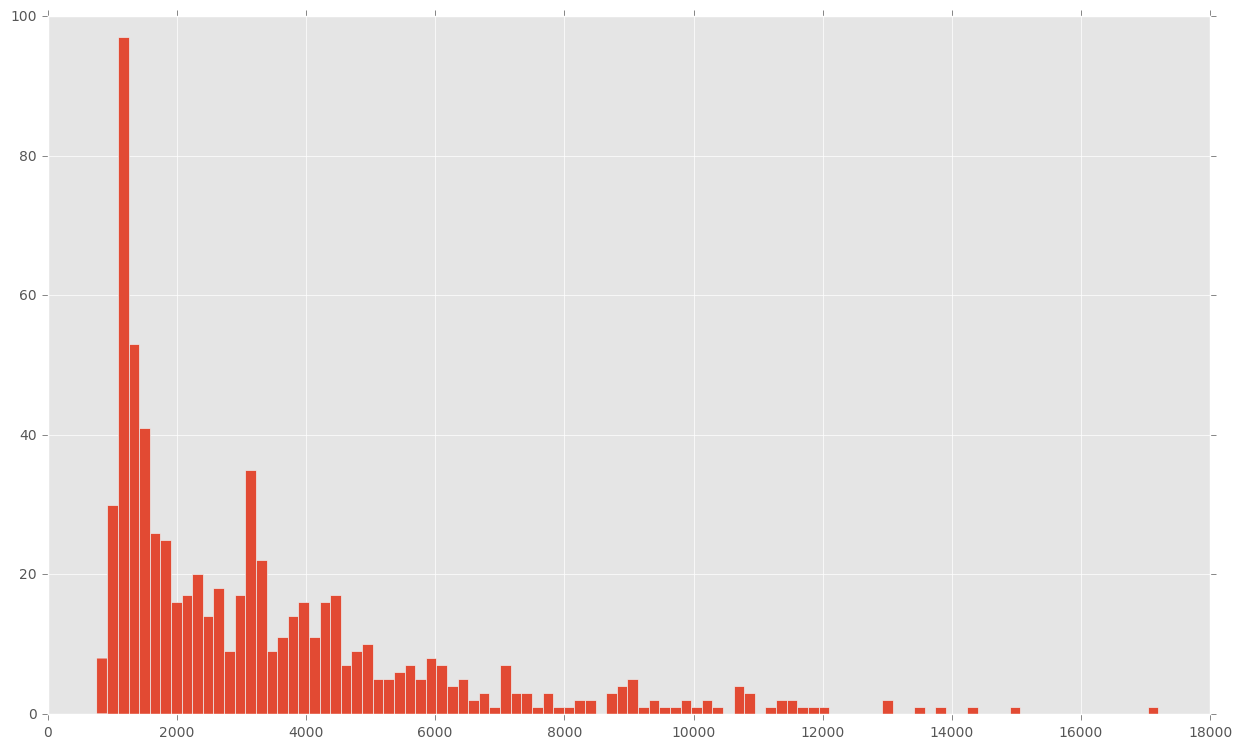

In [15]:
df.len.hist(bins=100)

Further analysis could be done by extracting information from headers